# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p
import explore as e

# Acquire

* This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey)
* I used the unencoded version of the data
* Each observation is a survey filled out by a Starbucks customer
* Each feature is a question asked in the survey or a timestamp for that survey
* This dataset contains 21 features and 122 observations

[Income Classification in Malaysia: What is B40, M40, and T20](https://www.iproperty.com.my/guides/what-is-b40-m40-t20-in-malaysia/) by Rebecca Hani Romeli was referenced for information regarding Malaysian currency and income levels

In [2]:
df = pd.read_csv('starbucks_survey.csv')

# Prepare

In [3]:
df = p.prepare_customer_survey(df)

In [4]:
def get_importance_string(value):
    
    if value <= 2:
        
        return "unimportant"
    
    elif value == 3:
        
        return "neutral"
    
    elif value >= 4:
        
        return "important"
    
def get_likelyhood_string(value):
    
    if value <= 2:
        
        return "unlikely"
    
    elif value == 3:
        
        return "neutral"
    
    elif value >= 4:
        
        return "likely"
    
def get_rating_string(value):
    
    if value <= 2:

        return "negative"

    elif value == 3:

        return "neutral"

    elif value >= 4:

        return "positive"
    
    
df['promotion_importance'] = df.promotion_importance.apply(get_importance_string)
df['gathering_likelyhood'] = df.gathering_likelyhood.apply(get_likelyhood_string)

ratings = ['brand_rating',
           'price_rating',
           'ambiance_rating',
           'wifi_rating',
           'service_rating']

for rating in ratings:
    
    df[f'{rating}'] = df[f'{rating}'].apply(get_rating_string)
    
    print('************************')
    print(df[f'{rating}'].value_counts())
    print('************************')

************************
positive    72
neutral     39
negative    10
Name: brand_rating, dtype: int64
************************
************************
neutral     48
negative    40
positive    33
Name: price_rating, dtype: int64
************************
************************
positive    78
neutral     34
negative     9
Name: ambiance_rating, dtype: int64
************************
************************
neutral     53
positive    48
negative    20
Name: wifi_rating, dtype: int64
************************
************************
positive    74
neutral     42
negative     5
Name: service_rating, dtype: int64
************************


# Explore

### Part I: What are the customers characteristics?
* Gender
* Age
* Employment
* Income
* Frequency of Visit
* Distance from Nearist Starbucks
* spend_per_visit

### Part II: why do customers come to Starbucks?
* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

### Part III: What do customers think of Starbucks?
* brand_rating
* price_rating
* ambiance_rating
* wifi_rating
* service_rating
* continue_buying

### Part IV: Miscellaneous
* membership_card
* promotions_from

## Part I: What are the customers characteristics?

#### What is the gender distribution of Starbucks customers?

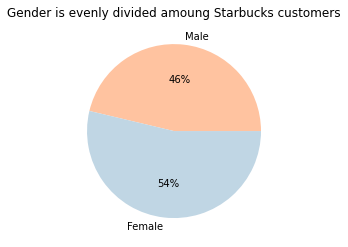

In [5]:
# calling function to generate visual
e.gender_pie(df)

#### What is the age distribution of Starbucks customers?

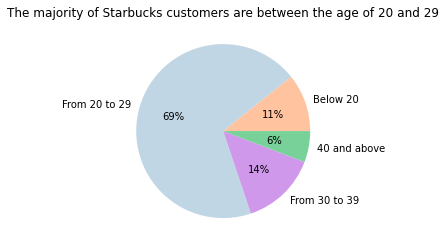

In [6]:
# calling function to generate visual 
e.age_pie(df)

#### What is the employment distribution of Starbucks customers?

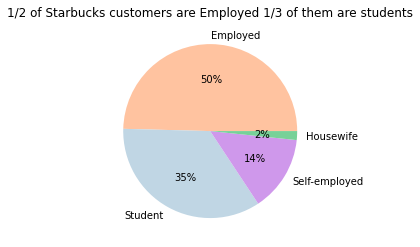

In [7]:
# calling function to generate visual
e.employment_pie(df)

#### What is the income distribution of Starbucks customers?

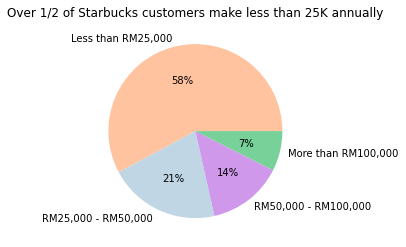

In [8]:
# calling function to generate visual
e.income_pie(df)

#### How often do Starbucks customers visit Satrbucks?

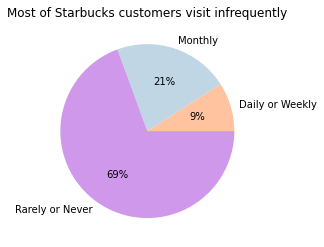

In [9]:
# calling function to generate visual
e.visit_pie(df)

### How many customers live near a Starbucks?

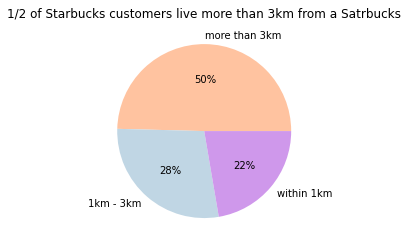

In [10]:
# calling function to generate visual
e.distance_pie(df)

### How much do Customers Spend at Starbucks per visit?

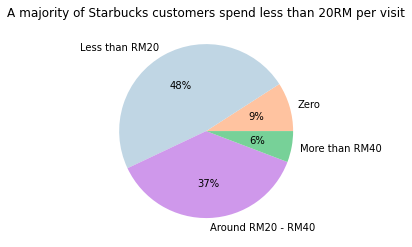

In [11]:
# calling function to generate visual
e.spend_pie(df)

### Majority of Starbucks customers:
* Are young adults aged 20-29
* Make less than RM25,000 annually
* Live more than 3 KM form a Starbucks
* Visit less than once a month
* Spend less than RM20 per visit

### Other findings:
* 1/3 of customers are students and 1/2 are employed in unknown fields
* Customers are nearly evenly split between male and female

### Follow up questions for latter inquiry?
* Do customers that live near Starbucks visit more frequiently?
* Do customers that spend differint amounts per visit represent differint customer groups?
* Do differint Employment types represent differint customer groups?
* Do customers who dine-in spend more?

### A note on Malaysian income:

It is difficult to interpret how servey results regarding income as they are in a currency that is unfamiliar to me.

Malaysia classifies income into three brackets delineating the bottom and middle 40%, and the top 20% of household incomes.

#### The ranges are:

* RM0-RM4,850 for the bottom tier (40%)
* RM4,850-RM8,700 for the mid tier (40%)
* RM8,701-more than RM15,041 for the top tire (20%)

According to the Income Classification in Malaysia: What is B40, M40, and T20 by Rebecca Hani Romeli, a living wage in Malaysia would be RM2,700 per month or RM32,400 per year, almost four times the cutoff for the top 20% of earners.

Because 42% of Starbucks customer base makes more than RM25,000 it would seem that it is serving the top income earners in it's area. a fact that might escape one who looks at the 58% that is below this number. We must keep in mind that a customer who earns less than RM25,000 is still in the top 20% of income earning households, though as suggested above being in the top 20% of earners does not garentee the RM32,400 one would need for a living wage.  

In [12]:
df.dining_type.value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never          6
Name: dining_type, dtype: int64

### Part II: Why do customers come to Starbucks?

* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

### What is the length of customer visits?

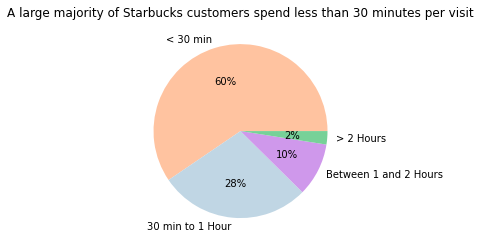

In [13]:
e.visit_length_pie(df)

### Do customers prefer to dine in or take thier food to go?

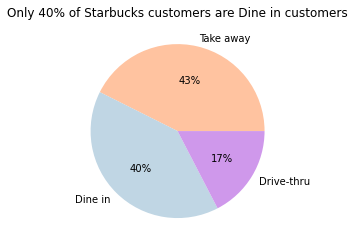

In [14]:
e.dining_type(df)

* 60% of customers place pick up orders 

### What are customers most frequently ordering?

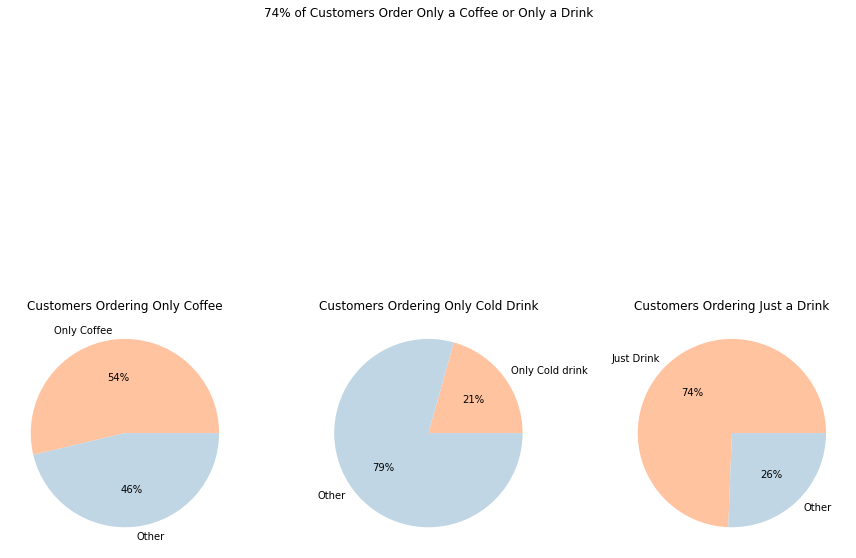

In [15]:
e.coffee_cold_drink_only(df)

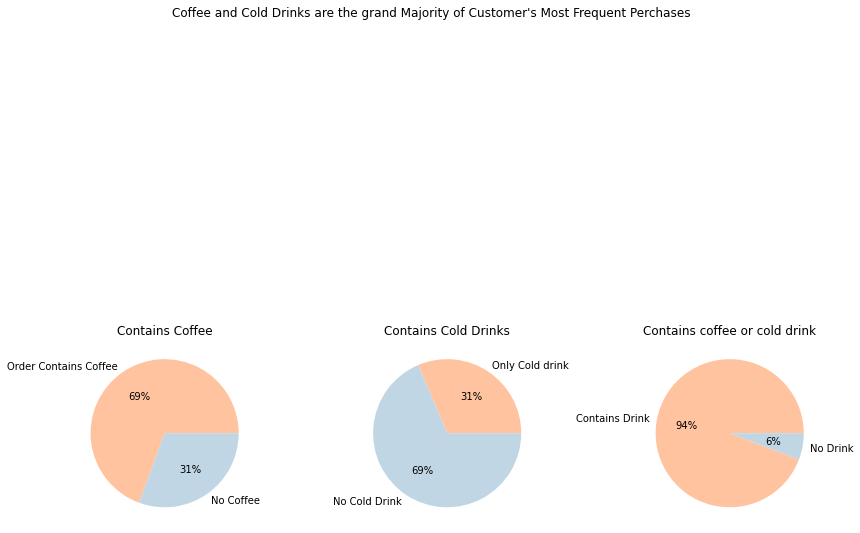

In [16]:
e.coffee_cold_drink_include(df)

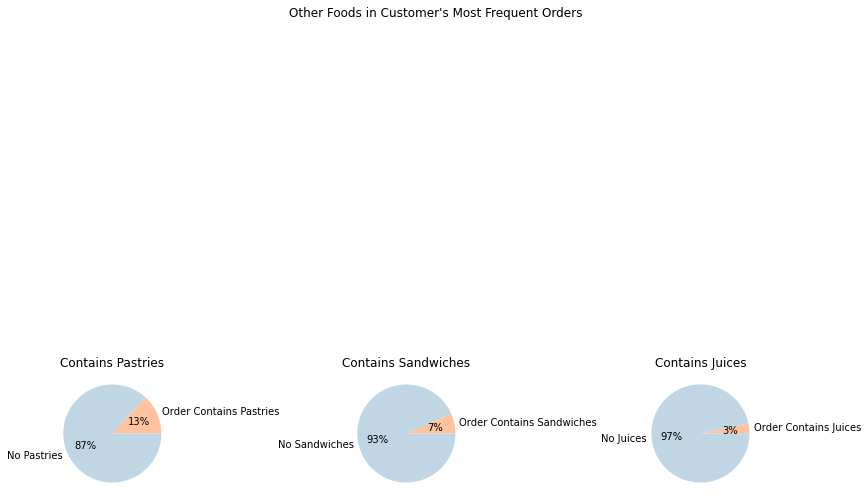

In [17]:
e.other_foods(df)

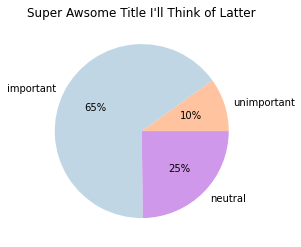

In [18]:
e.omni_pie(df.promotion_importance)

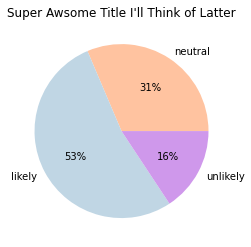

In [19]:
e.omni_pie(df.gathering_likelyhood)

### Part III: What do customers think of Starbucks?

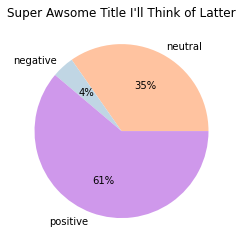

In [20]:
e.omni_pie(df.service_rating)